In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('E:\Data Science')

import warnings
warnings.filterwarnings("ignore")

We have cleaned the dataset in another notebook. You can see the details [here](https://github.com/galiph/ExploratoryDataAnalysis/blob/master/01_Titanic_EDA.ipynb). 

In [80]:
titanic_df = pd.read_csv('./data/titanic_train.csv')

#Converting Sex
sex_conv = lambda x : 1 if x=='male' else 0 
titanic_df['Is_male'] = titanic_df['Sex'].apply(sex_conv)

# Adding Family column
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.drop('SibSp',axis=1,inplace=True)
titanic_df.drop('Parch',axis=1,inplace=True)

# Adding "Title" column
titanic_df['Title']=0
for i in titanic_df:
    titanic_df['Title']=titanic_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)  
    
# Imputing Age  
titanic_df['Age'] = titanic_df.groupby('Title')['Age'].transform(lambda x: x.fillna(np.round(x.mean())))

# Map of aggregated titles:
titles_dict = {'Capt': 'Other','Major': 'Other', 'Jonkheer': 'Other','Don': 'Other',
               'Sir': 'Other','Dr': 'Other','Rev': 'Other','Countess': 'Other',
               'Dona': 'Other','Mme': 'Mrs','Mlle': 'Miss','Ms': 'Miss',
               'Mr': 'Mr','Mrs': 'Mrs','Miss': 'Miss', 'Master': 'Master',
               'Lady': 'Other'}
titanic_df['Title'] = titanic_df['Title'].map(titles_dict)

# Dropping some columns
titanic_df.drop(['Ticket', 'Cabin', "Name"], axis=1, inplace = True)

# Converting Age
titanic_df['Age'] =pd.cut(titanic_df['Age'], bins=[1, 12, 50, 200], labels=['Child','Adult','Elder'])

In [81]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Is_male,FamilySize,Title
0,1,0,3,male,Adult,7.2500,S,1,1,Mr
1,2,1,1,female,Adult,71.2833,C,0,1,Mrs
2,3,1,3,female,Adult,7.9250,S,0,0,Miss
3,4,1,1,female,Adult,53.1000,S,0,1,Mrs
4,5,0,3,male,Adult,8.0500,S,1,0,Mr


We don't need "PassengerId" feature for now. So let'drop it.

In [82]:
# drop PassengerId
titanic_df.drop('PassengerId', axis=1, inplace=True)

In [83]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null object
Age           877 non-null category
Fare          891 non-null float64
Embarked      889 non-null object
Is_male       891 non-null int64
FamilySize    891 non-null int64
Title         889 non-null object
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 56.7+ KB


Let's convert the features to categoricel except "Fare" and "Family"

In [84]:
titanic_df.Pclass = pd.Categorical(titanic_df.Pclass)
titanic_df.Embarked = pd.Categorical(titanic_df.Embarked)
titanic_df.Title= pd.Categorical(titanic_df.Title)

Now transforming categorical feature to dummy variables

In [85]:
titanic_df = pd.get_dummies(titanic_df, drop_first=1)  
titanic_df.head()

,Survived,Fare,Is_male,FamilySize,Pclass_2,Pclass_3,Sex_male,Age_Adult,Age_Elder,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,7.2500,1,1,0,1,1,1,0,0,1,0,1,0,0
1,1,71.2833,0,1,0,0,0,1,0,0,0,0,0,1,0
2,1,7.9250,0,0,0,1,0,1,0,0,1,1,0,0,0
3,1,53.1000,0,1,0,0,0,1,0,0,1,0,0,1,0
4,0,8.0500,1,0,0,1,1,1,0,0,1,0,1,0,0


In [86]:
titanic_df.to_csv("./data/titanic_transformed.csv")

In [8]:
# Get training and test sets
from sklearn.model_selection import train_test_split
X = titanic_df.drop(["Survived"], axis = 1)
y = titanic_df.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

Let' have Box-Cox transformation

In [9]:
from scipy.stats import boxcox
X_train_boxcox = X_train.copy()
X_train_boxcox['Fare'] = boxcox(X_train_boxcox['Fare'] + 1)[0]
X_test_boxcox = X_test.copy()
X_test_boxcox['Fare'] = boxcox(X_test_boxcox['Fare'] + 1)[0]

In [10]:
X.head()

,Fare,Is_male,FamilySize,Pclass_2,Pclass_3,Sex_male,Age_Adult,Age_Elder,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,7.2500,1,1,0,1,1,1,0,0,1,0,1,0,0
1,71.2833,0,1,0,0,0,1,0,0,0,0,0,1,0
2,7.9250,0,0,0,1,0,1,0,0,1,1,0,0,0
3,53.1000,0,1,0,0,0,1,0,0,1,0,0,1,0
4,8.0500,1,0,0,1,1,1,0,0,1,0,1,0,0


In [11]:
X_train_boxcox.head()

,Fare,Is_male,FamilySize,Pclass_2,Pclass_3,Sex_male,Age_Adult,Age_Elder,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
661,1.928220,1,0,0,1,1,1,0,0,0,0,1,0,0
393,3.895994,0,1,0,0,0,1,0,0,0,1,0,0,0
266,3.176069,1,5,0,1,1,1,0,0,1,0,1,0,0
144,2.271567,1,0,1,0,1,1,0,0,1,0,1,0,0
446,2.661845,0,1,1,0,0,1,0,0,1,1,0,0,0


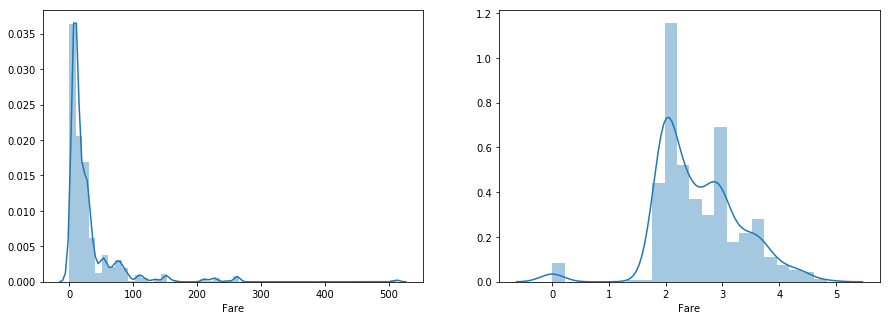

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(X_train.Fare)
plt.subplot(122)
sns.distplot(X_train_boxcox.Fare)
plt.show()

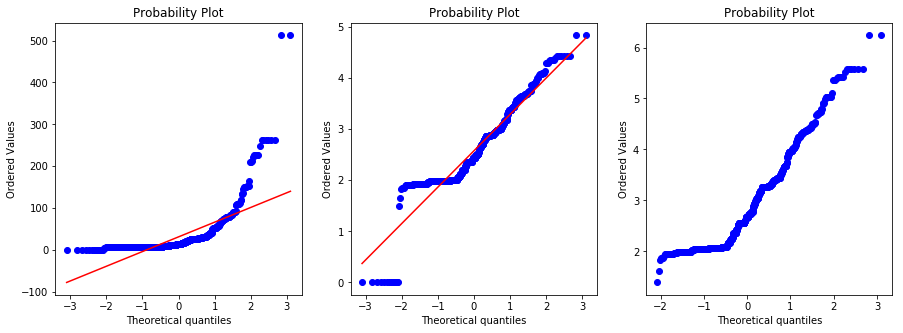

In [13]:
from scipy import stats
plt.figure(figsize=(15,5))
plt.subplot(131)
res = stats.probplot(X_train.Fare, plot=plt)
plt.subplot(132)
res = stats.probplot(X_train_boxcox.Fare, plot=plt)
plt.subplot(133)
res = stats.probplot(np.log(X_train.Fare), plot=plt)

Polynomial Expansion

In [14]:
# Rescale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_boxcox_scaled = scaler.fit_transform(X_train_boxcox)
X_test_boxcox_scaled = scaler.transform(X_test_boxcox)

In [19]:
# Get polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2).fit(X_train_boxcox)
X_train_poly = poly.transform(X_train_boxcox_scaled)
X_test_poly = poly.transform(X_test_boxcox_scaled)

# Feature Selection

Select features using chi-squared test

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Get score using original model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy (original): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

C:\Python\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


CV accuracy (original): 0.819 +/- 0.032


Get score using models with feature selection

In [31]:
X_train_poly.shape

(712, 120)

In [32]:
scores_df = pd.DataFrame(columns = ["Num Features", "Mean of Scores", "Std of Scores"])

for i in range(1, X_train_poly.shape[1]+1, 1):
    # Select i features
    select = SelectKBest(score_func=chi2, k=i)
    select.fit(X_train_poly, y_train)
    X_train_poly_selected = select.transform(X_train_poly)

    # Model with i features selected
    logreg.fit(X_train_poly_selected, y_train)
    scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
    #print('CV accuracy (number of features = %i): %.3f +/- %.3f' % (i, np.mean(scores), np.std(scores)))
    add_score = {'Num Features' : i, 
                 'Mean of Scores' : np.mean(scores) , 
                 'Std of Scores' : np.std(scores) }
    scores_df = scores_df.append(add_score, ignore_index = True)

In [26]:
max_score = scores_df[scores_df['Mean of Scores'] == scores_df['Mean of Scores'].max() ]
max_score

,Num Features,Mean of Scores,Std of Scores
92,93.0,0.830079,0.019832


In [50]:
# Print the number of features
max_score_k = int(max_score['Num Features'].iloc[0])
print('Number of features when highest score: %i' % max_score_k)

Number of features when highest score: 93


Model

In [51]:
# Select features
select = SelectKBest(score_func=chi2, k=max_score_k)
select.fit(X_train_poly, y_train)
X_train_poly_selected = select.transform(X_train_poly)

In [53]:
# Fit model
logreg = LogisticRegression(C=1)
logreg.fit(X_train_poly_selected, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
# Model performance
scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.830 +/- 0.020


## 3.2. Learning curve

In [72]:
from sklearn.model_selection import learning_curve

In [70]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

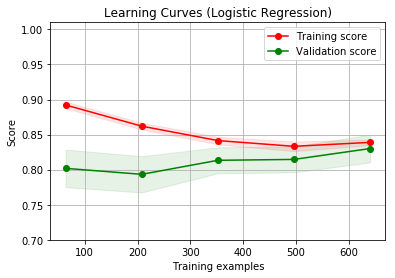

In [73]:
# Plot learning curves
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, X_train_poly_selected, 
                    y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

## 3.3. Validation curve

In [76]:
from sklearn.model_selection import validation_curve

In [74]:
# Plot validation curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

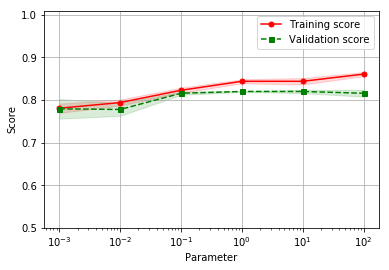

In [77]:
# Plot validation curve
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=X_train_poly_selected, y=y_train, 
                      param_name=param_name, ylim=(0.5, 1.01), param_range=param_range);

Best C = 1,just before overfitting